In [136]:
from IPython.display import HTML, Javascript, display
import IPython
from ipywidgets import widgets
import random

# Create button that runs the below cell
def run_below(ev):
    display(Javascript('IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])'))

run_code_below_button = widgets.Button(description="Run code")
run_code_below_button.on_click(run_below)

# Create toggle code button
def toggle_code(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        # toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Create the run code and toggle code buttons for the cell below
def create_buttons():
    display(run_code_below_button)
    display(toggle_code(for_next=True))
    
# Create a button that hides all the code in the notebook and autoruns on the notebook
hide_all_code_button = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code for this notebook."></form>''')
display(hide_all_code_button)


# CODE BELOW WAS SUPPOSED TO BE A SMARTER TOGGLE BUTTON - DOESNT WORK YET
# javascript_functions = {False: "hide()", True: "show()"}
# button_descriptions  = {False: "Show code", True: "Hide code"}
# STATE = False
# def toggle_code(ev):
#     import random
#     for_next = True
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     output = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()"></a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#     )

#     display(HTML(output))


# def button_action(value):

#     """
#     Calls the toggle_code function and updates the button description.
#     """

#     state = value.new

#     toggle_code()
#     # Change the state
#     state = not state

#     value.owner.description = button_descriptions[state]
    
# def create_buttons():
#     state = False
#     #toggle_code(state)
#     code_toggle_button = widgets.ToggleButton(description = button_descriptions[state])
#     code_toggle_button.observe(button_action, "value")
#     display(widgets.HBox([run_code_below_button, code_toggle_button]))



# ALSO DOESNT WORK YET
# # Create toggle code button
# def toggle_code(for_next=True):
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide code'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         # toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     html = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()">{toggle_text}</a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#         toggle_text=toggle_text
#     )

#     return HTML(html)

# toggle_code_below_button = widgets.Button(description="Show/hide code")
# toggle_code_below_button.on_click(toggle_code)

# def create_buttons():
#     display(widgets.HBox([run_code_below_button, toggle_code_below_button]))

In [137]:
# Basic dependencies
import math

# Numerical and dataframe dependencies
import numpy as np
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt

# Deep Learning 
import tensorflow as tf

tf.get_logger().setLevel('INFO') # Ignore warning/depreciation messages in the logger

%matplotlib inline

In [138]:
# Helper functions


# Intro to AI Notebook

<img src="images/IntroToAIOpeningImage.jpeg" width="600">

Welcome to the Jupyter notebook! This is the classic environment for a data scientist and Machine Learning Engineer. The first code cell that you ran hides all of the code we will be running today, so you don't have to worry about it. But, if you would like to take a look then you can toggle the code on and off at any time!

The intention of this notebook is to give you an interactive and friendly introduction to AI and Machine Learning by stepping through a classic data scientist.

<img src="images/DataScienceLifeCycle.png" width="400" title="Data Science Workflow">

A classic Machine Learning workflow is made up of the following general steps

- Define Problem
- Specify Inputs & Outputs
- Exploratory data analysis
- Data Collection
- Data Preprocessing
- Data Cleaning
- Visualization
- Model Design, Training, and Offline Evaluation
- Model Deployment, Online Evaluation, and Monitoring
- Model Maintenance, Diagnosis, and Retraining

<img src="images/MLWorkflow.png" width="800" title="ML Workflow">

<img src="images/MLWorkflowLowLevel.png" title="Low Level ML Workflow">



In [139]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [10]:
print('Hello worldy!')

Hello worldy!


### Import Data

CIFAR is an acronym that stands for the [Canadian Institute For Advanced Research](https://www.cs.toronto.edu/~kriz/cifar.html) and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is *“solved”*. It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

In [9]:
# Set overall global variables
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
IMG_SHAPE = (HEIGHT, WIDTH, NUM_CHANNELS)
CLASS_NAMES = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
NUM_CLASSES = len(CLASS_NAMES) # 10
NUM_TRAIN_SAMPLES = 50000

BATCH_SIZE = 128
NUM_EPOCHS = 60

In [162]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Really we should also create a validation set - check if we want to do this or will it be too confusing?
# NUM_VAL_IMAGES = 10000
# from sklearn.model_selection import train_test_split 
# We will use this function to split our "training" set into our "training" + "validation" set - confusing name!
# (X_train, X_val), (y_train, y_val) = train_test_split(X_train, y_train, stratify=y_train, test_size=NUM_VAL_IMAGES)
# For now lets just set X_val, y_val to X_test, y_test
X_val, y_val = X_test, y_test

In [11]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [140]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

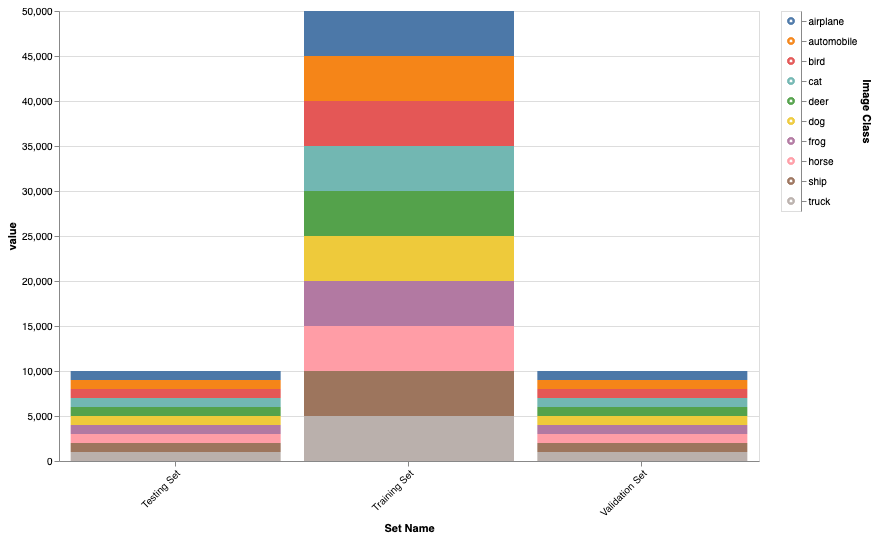

In [60]:
# Get the counts of each of the image types and put them in a dataframe
set_value_counts = pd.DataFrame([
    np.unique(y_train, return_counts=True)[1],
    np.unique(y_val, return_counts=True)[1],
    np.unique(y_test, return_counts=True)[1]
], index=['Training Set', 'Validation Set', 'Testing Set'])

set_value_counts.columns = set_value_counts.columns.map(CLASS_NAMES)
set_value_counts.columns.name = 'Image Class'
set_value_counts.index.name = 'Set Name'

# Transform the dataframe into a format suitable for altair
source = set_value_counts.reset_index().melt('Set Name')

# Create a multi selection index with every class pre-initialised
selection = alt.selection_multi(
    fields=["Image Class"]
)
color = alt.condition(
    selection, alt.Color("Image Class:N", legend=None), alt.value("lightgray")
)

barchart = (
    alt.Chart(source)
    .mark_bar()
    .encode(x=alt.X("Set Name:N", axis=alt.Axis(labelAngle=-45)),
            y="value:Q", color=color, 
            tooltip=[alt.Tooltip("Image Class:N", title='Image Class'), 
                     alt.Tooltip("value:N", title='Number of Images')])
    .add_selection(selection)
    .properties(width=700,height=450)
)

legend = (
    alt.Chart(source)
    .mark_point()
    .encode(y=alt.Y("Image Class:N", axis=alt.Axis(orient="right")), color=color)
    .add_selection(selection)
)

barchart | legend

In [82]:
train_images = {class_name: X_train[(y_train == class_idx).squeeze()] 
                for class_idx, class_name in CLASS_NAMES.items()}



In [141]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [147]:
from ipywidgets import interact, widgets
NUM_TRAIN_IMAGES = 101
img_idx_slider = widgets.IntSlider(value=0, min=0, max=NUM_TRAIN_IMAGES - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))


@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
#     progress_bar = widgets.IntProgress(min=0, max=NUM_CLASSES,
#                                        layout=widgets.Layout(width='100%', height='50px')) # instantiate the bar
#     display(progress_bar) # display the bar
    for ax, class_name in zip(axes.flat, CLASS_NAMES.values()):
        ax.imshow(train_images[class_name][i].squeeze())
        ax.set_title(f"Class / label: {class_name}")

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

In [163]:
NUM_GPUS = 1
BS_PER_GPU = 64
NUM_EPOCHS = 60

HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
IMG_SHAPE = (HEIGHT, WIDTH, NUM_CHANNELS)
NUM_CLASSES = 10
NUM_TRAIN_SAMPLES = 50000

BASE_LEARNING_RATE = 0.1
LR_SCHEDULE = [(0.1, 30), (0.01, 45)]

In [164]:
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler

import resnet

def preprocess(x, y, for_mobilenet=False):
    x = tf.image.per_image_standardization(x)
    return x, y

def augmentation(x, y):
    x = tf.image.resize_with_crop_or_pad(
        x, HEIGHT + 8, WIDTH + 8)
    x = tf.image.random_crop(x, [HEIGHT, WIDTH, NUM_CHANNELS])
    x = tf.image.random_flip_left_right(x)
    return x, y

def schedule(epoch):
    initial_learning_rate = BASE_LEARNING_RATE * BS_PER_GPU / 128
    learning_rate = initial_learning_rate
    for mult, start_epoch in LR_SCHEDULE:
        if epoch >= start_epoch:
            learning_rate = initial_learning_rate * mult
        else:
            break
    tf.summary.scalar('learning rate', data=learning_rate, step=epoch)
    return learning_rate

# y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
# y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

tf.random.set_seed(42)
train_dataset = train_dataset.map(augmentation).map(preprocess).shuffle(NUM_TRAIN_SAMPLES).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)
val_dataset = val_dataset.map(preprocess).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)
test_dataset = test_dataset.map(preprocess).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)

input_shape = (32, 32, 3)
img_input = tf.keras.layers.Input(shape=input_shape)
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

if NUM_GPUS == 1:
    model = resnet.resnet56(img_input=img_input, classes=NUM_CLASSES)
    model.compile(
              optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
else:
    mirrored_strategy = tf.distribute.MirroredStrategy()
    with mirrored_strategy.scope():
        model = resnet.resnet56(img_input=img_input, classes=NUM_CLASSES)
        model.compile(
                optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])  

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(log_dir + "/metrics")
file_writer.set_as_default()
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    update_freq='batch',
    histogram_freq=1)

lr_schedule_callback = LearningRateScheduler(schedule)

# model.fit(train_dataset,
#           epochs=NUM_EPOCHS,
#           validation_data=test_dataset,
#           validation_freq=1,
#           callbacks=[tensorboard_callback, lr_schedule_callback])
# model.evaluate(test_dataset)

# model.save('model.h5')

# new_model = keras.models.load_model('model.h5')
 
# new_model.evaluate(test_dataset)

In [18]:
def preprocess_mobilenet(x, y, for_mobilenet=False):
    x = tf.image.resize(x, (224, 224), method='bicubic') # could make `rows` in [96, 128, 160, 192, 224]?
    x = tf.image.per_image_standardization(x)
    return x, y

train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

tf.random.set_seed(42)
train_dataset = train_dataset.map(augmentation).map(preprocess_mobilenet).shuffle(NUM_TRAIN_SAMPLES).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)
test_dataset = test_dataset.map(preprocess_mobilenet).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)


# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

for image_batch, label_batch in train_dataset.take(1):
   pass

print('Image batch shape:', image_batch.shape)

feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(NUM_CLASSES)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

Image batch shape: (128, 224, 224, 3)
(128, 7, 7, 1280)
(128, 1280)
(128, 10)


In [165]:
# Create the baseline model described in the text above (TODO)
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='Baseline Deep Neural Network Model')
# Print model summary - potentially remove
print(baseline_model.summary())

# Compile the model - we will use the Adam optimiser and categorical crossentropy loss, logging the accuracy
# TODO: Tensorboard here and integrate callbacks into live tracking below? Potentially just a cleaner interface
baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)  

# Fit the baseline model to the training data, validating against the validation data
baseline_model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=val_dataset
)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
781/781 [==============================] - 33s 43ms/step - loss: 10.7062 - accuracy: 0.1956 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/60
781/781 [==============================] - 30s 39ms/step - loss: 2.1821 - ac

KeyboardInterrupt: 

In [17]:
base_learning_rate = 0.0001
baseline_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate), # Change to Adam?
              loss='binary_crossentropy',
              metrics=['accuracy'])
baseline_model.fit(train_dataset,
          epochs=NUM_EPOCHS,
          validation_data=test_dataset)

Epoch 1/60
      1/Unknown - 20s 20s/step

KeyboardInterrupt: 

In [ ]:




# Build a basic "baseline" model - just flattening the features and mapping to a dense layer.
# Visualise training accuracy and losses. Predictions of the two models
# Confusion matrix of two models **
# Visualise predictions of two models.
# tSNE embeddings of test images and 10 kNN with autonaming of clusters by class, perhaps dots are test images. Interactive

In [ ]:
## Nice image slider: https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(x_test)-1, description="Image index")

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(x_test[i], cmap=plt.cm.binary)
    ax1.set_title(f"lbl: {class_names[y_test[i]]}")
    ax1.set_xlabel(f"pred: {class_names[preds[i]]}")


    ax2.bar(x=[class_names[i] for i in range(10)], height=probs[i]*100)
    plt.xticks(rotation=90)